In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

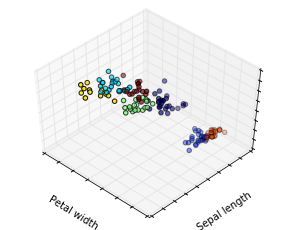

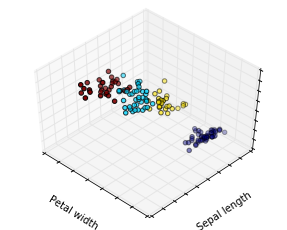

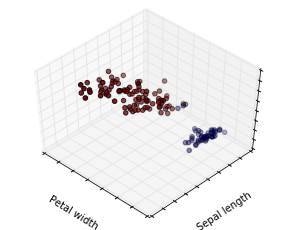

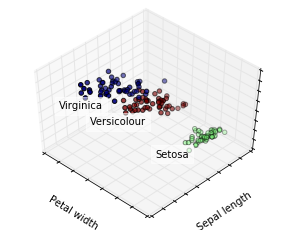

In [2]:
### this is for dataset from sklearn package, iris data set
np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target
estimators = {'k_means_iris_3': KMeans(n_clusters=4),
'k_means_iris_8': KMeans(n_clusters=7),
'k_means_iris_bad_init': KMeans(n_clusters=2, n_init=3,init='random')}
fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1
# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1),('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
        X[y == label, 0].mean() + 1.5, X[y == label, 2].mean(), name,
        horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

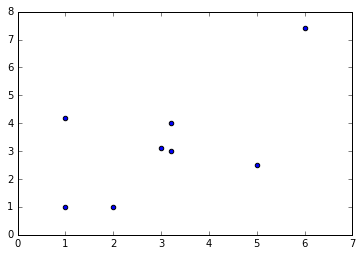

In [3]:
## The data points in class
data = np.array([[1,1],[2,1],[1,4.2],[3,3.1],[3.2,4],[6,7.4],[3.2,3],[5,2.5]])
plt.scatter(data[:,0],data[:,1])

In [4]:
# model = KMeans(n_clusters=2,init=np.array([[1,1],[5,2.5]]))
model = KMeans(n_clusters=4)
model.fit(data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

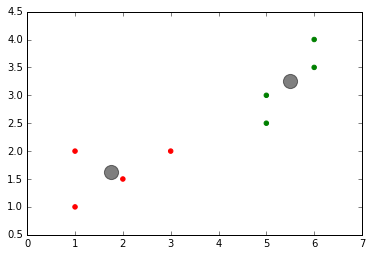

In [6]:
labels = model.labels_
centers = model.cluster_centers_
## Define colors
col = ['red','green','yellow','cyan','black','grey','white','blue']
colors= [col[i] for i in labels]
plt.scatter(data[:, 0], data[:, 1],color=colors)
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.5);
plt.show()


In [ ]:
## if you want to define your own K-means algorithm with above data
## The following is the pseudocode
def My_Kmeans(data, cluster_number):
## initialize the centers
    for t in range(cluster_number):
        c[t] =[x,y]
        # you can randomly select some points from the data as initial center as well
    for i in range(iteration):
        for t in range(cluster_number):
        # calculate distance between c[t] and all points in data
        # assign the points to cluster based on distance table
        # you should get the assign table
        # update the centers for each cluster
        if # assignment table doesn't change or some ending criteria is meet:
            break
    return # assitnment and centers